In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import random
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train_users_2.csv', 'countries.csv', 'test_users.csv', 'sessions.csv', 'sample_submission_NDF.csv', 'age_gender_bkts.csv', 'sample_submission.csv']


train_users_2, test_users 전처리

In [2]:
train_users = pd.read_csv('../input/train_users_2.csv')
test_users = pd.read_csv('../input/test_users.csv')
print(train_users.shape)
print(test_users.shape)

(213451, 16)
(62096, 15)


In [3]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
print(train_users.isnull().sum()/train_users.shape[0])
print("\n")
print(test_users.isnull().sum()/test_users.shape[0])

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.583473
gender                     0.000000
age                        0.412226
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.028414
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
country_destination        0.000000
dtype: float64


id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         1.000000
gender                     0.000000
age                        0.465022
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affil

In [5]:
train_users=train_users.drop('date_first_booking',axis=1)
test_users=test_users.drop('date_first_booking',axis=1)

In [6]:
print(train_users.isnull().sum()/train_users.shape[0])
print("\n")
print(test_users.isnull().sum()/test_users.shape[0])

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
gender                     0.000000
age                        0.412226
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.028414
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
country_destination        0.000000
dtype: float64


id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
gender                     0.000000
age                        0.465022
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.000322
signup_app                 0.000000
first_devic

In [7]:
train_users=train_users.dropna(subset = ['age', 'first_affiliate_tracked'])
test_users=test_users.dropna(subset = ['age', 'first_affiliate_tracked'])

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


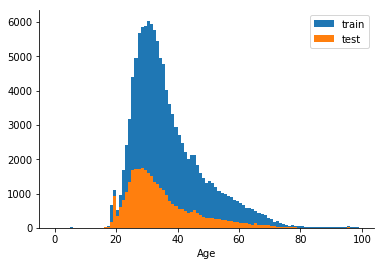

In [8]:
bins_range = range(0, 100, 1) 
plt.xlabel('Age')
plt.hist(train_users['age'],bins=bins_range, normed=False,label='train')
plt.hist(test_users['age'],bins=bins_range, normed=False,label='test')
plt.legend()
sns.despine()
plt.show()


In [9]:
train_users['age'].describe()

count    123429.000000
mean         49.307715
std         153.501905
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [10]:
print(train_users[train_users['age']>100].shape)
print(test_users[test_users['age']>100].shape)

(2295, 15)
(345, 14)


In [11]:
train_users=train_users[train_users['age']<100]
test_users=test_users[test_users['age']<100]
train_users=train_users[train_users['age']>10]
test_users=test_users[test_users['age']>10]

# Gender

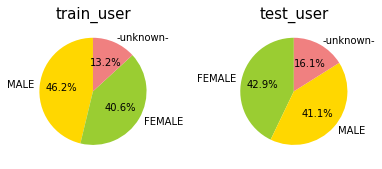

In [12]:
labels=train_users.gender.unique().tolist()[:-1] #other는 거의 없어서 버림
ratio=train_users.gender.value_counts().tolist()[:-1]
labels_t=test_users.gender.unique().tolist()[:-1]
ratio_t=test_users.gender.value_counts().tolist()[:-1]
colors = ['gold', 'yellowgreen', 'lightcoral']
colors_t = ['yellowgreen','gold', 'lightcoral']
plt.subplot(121)
plt.subplots_adjust(wspace=0.5)
plt.pie(ratio,labels=labels,labeldistance=1.1, shadow=False,autopct='%1.1f%%', startangle=90,colors=colors, pctdistance=0.6)
plt.title('train_user',fontsize=15)
plt.subplot(122)
plt.pie(ratio_t,labels=labels_t,labeldistance=1.1, shadow=False,autopct='%1.1f%%', startangle=90,colors=colors_t, pctdistance=0.6)
plt.title('test_user',fontsize=15)
plt.show()

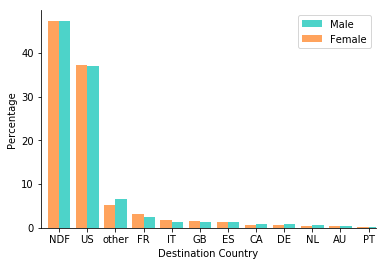

In [13]:
women = sum(train_users['gender'] == 'FEMALE')
men = sum(train_users['gender'] == 'MALE')

female_destinations = train_users.loc[train_users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = train_users.loc[train_users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

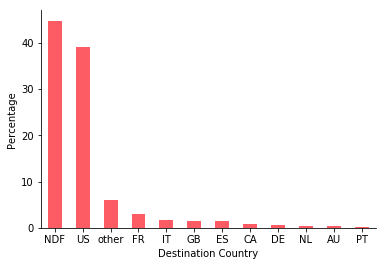

In [14]:
destination_percentage = train_users.country_destination.value_counts() / train_users.shape[0] * 100
destination_percentage.plot(kind='bar',color='#FD5C64', rot=0)
# Using seaborn can also be plotted
# sns.countplot(x="country_destination", data=users, order=list(users.country_destination.value_counts().keys()))
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

country=train_users.country_destination.unique().tolist() #other는 거의 없어서 버림
num=train_users.country_destination.value_counts().tolist()
mylist=[]
for i in range(len(country)):
    a=country[i]
    mylist+=[a]*num[i]
train_users['gender'][train_users.gender=='-unkown-']=random.choice(mylist)
train_users['gender'][train_users.gender=='OTHER']=random.choice(mylist)

In [15]:
gend=['MALE','FEMALE']
train_users.gender[train_users.gender=='-unknown-']=random.choice(gend)
train_users.gender[train_users.gender=='OTHER']=random.choice(gend)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
gend=['MALE','FEMALE']
test_users.gender[test_users.gender=='-unknown-']=random.choice(gend)
test_users.gender[test_users.gender=='OTHER']=random.choice(gend)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Language

In [17]:
print((sum(train_users.language == 'en') / train_users.shape[0])*100)

96.36904270256876


# Date

In [18]:
train_users['date_account_created'] = pd.to_datetime(train_users['date_account_created'])
train_users['date_first_active'] = pd.to_datetime(train_users.timestamp_first_active//1000000, format='%Y%m%d')

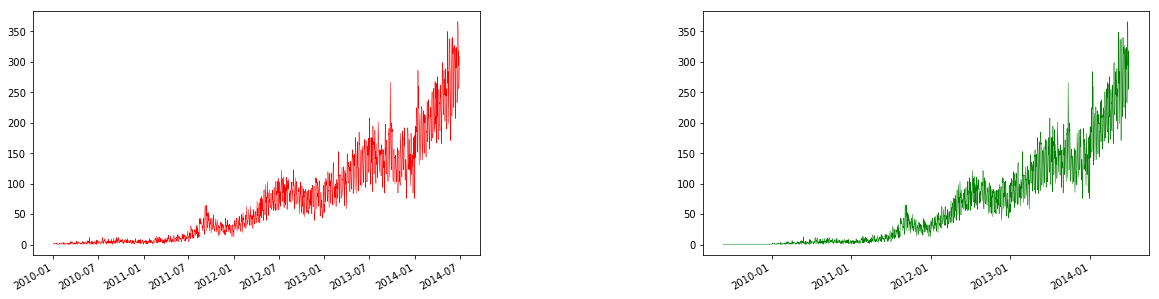

In [19]:
xfmt = mdates.DateFormatter('%Y-%m')
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace=0.5)
plt.subplot(121)
ax1=train_users.date_account_created.value_counts().plot(kind='line',color='red',linewidth=0.5)
plt.subplot(122)
ax2=train_users.date_first_active.value_counts().plot(kind='line', linewidth=0.5, color='green')
ax1.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_formatter(xfmt)
plt.show()

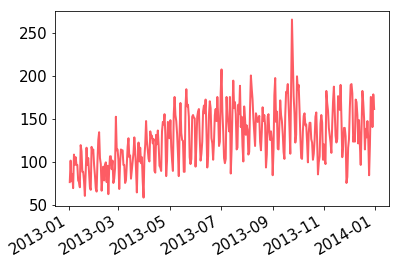

In [20]:
users_2013 = train_users[train_users['date_first_active'] > pd.to_datetime(20130101, format='%Y%m%d')]
users_2013 = users_2013[users_2013['date_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')]
users_2013.date_first_active.value_counts().plot(kind='line', linewidth=2, color='#FD5C64')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.show()

In [21]:
weekdays = []
for date in train_users.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

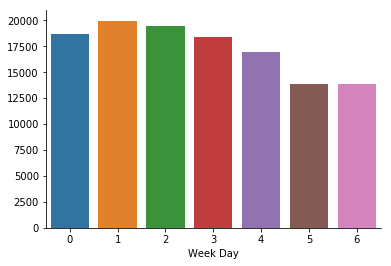

In [22]:
sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()

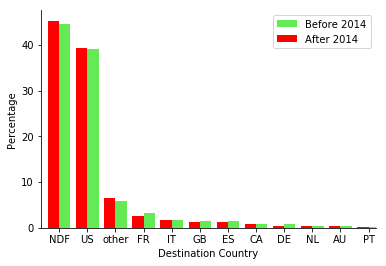

In [23]:
date = pd.to_datetime(20140101, format='%Y%m%d')

before = sum(train_users.loc[train_users['date_first_active'] < date, 'country_destination'].value_counts())
after = sum(train_users.loc[train_users['date_first_active'] > date, 'country_destination'].value_counts())
before_destinations = train_users.loc[train_users['date_first_active'] < date, 
                                'country_destination'].value_counts() / before * 100
after_destinations = train_users.loc[train_users['date_first_active'] > date, 
                               'country_destination'].value_counts() / after * 100
before_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Before 2014', rot=0)
after_destinations.plot(kind='bar', width=width, color='red', position=1, label='After 2014', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

Countries

In [24]:
countries= pd.read_csv('../input/countries.csv')

In [25]:
countries
#distance?????

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


Session

In [26]:
sessions= pd.read_csv('../input/sessions.csv')

In [27]:
sessions

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [28]:
sessions['user_id'].unique().shape

(135484,)